In [34]:
import torch
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from rdkit.Chem import AllChem as Chem
from sklearn.preprocessing import StandardScaler

In [31]:
hpk1 = pd.read_csv("/y/Aurora/Fergie/data/preprocessed/HPK1_preprocess.csv")
kinase = pd.read_csv("/y/Aurora/Fergie/data/preprocessed/kinase_preprocess.csv")
non_kin = pd.read_csv("/y/Aurora/Fergie/data/preprocessed/non_kinase_preprocess.csv")
zinc = pd.read_csv("/y/Aurora/Fergie/data/preprocessed/zinc_preprocess.csv")

smiles_h1 = hpk1["SMILES"]
smiles_kin = kinase["SMILES"]
smiles_non_kin = non_kin["SMILES"]
smiles_zinc = zinc["SMILES"]
smiles_zinc

In [11]:
def get_fp(list_of_smi):
    """ Function to get fingerprint from a list of SMILES"""
    fingerprints = []
    mols = [Chem.MolFromSmiles(x) for x in list_of_smi]
    # if rdkit can't compute the fingerprint on a SMILES
    # we remove that SMILES
    idx_to_remove = []
    for idx,mol in enumerate(mols):
        try:
            fprint = Chem.GetMorganFingerprintAsBitVect(mol, 2, useFeatures=False)
            fingerprints.append(fprint)
        except:
            idx_to_remove.append(idx)
    
    smi_to_keep = [smi for i,smi in enumerate(list_of_smi) if i not in idx_to_remove]
    return fingerprints, smi_to_keep
def get_embedding(data):
    """ Function to compute the UMAP embedding"""            
    data_scaled = StandardScaler().fit_transform(data)
    
    embedding = umap.UMAP(n_neighbors=10,
                          min_dist=0.5,
                          metric='correlation',
                          random_state=16).fit_transform(data_scaled)
    
    return embedding

In [32]:
fp_hp1, sm_for_hp1 = get_fp(smiles_h1)
fp_kin, sm_for_kin = get_fp(smiles_kin)
fp_non_kin, sm_for_non_kin = get_fp(smiles_non_kin)
#fp_zinc, sm_for_zinc = get_fp(smiles_zinc)


fp_hp1 = np.array(fp_hp1)
fp_kin = np.array(fp_kin)
fp_non_kin = np.array(fp_non_kin)
#fp_zinc = np.array(fp_zinc)

In [33]:
embedding_hp1 = get_embedding(fp_hp1)
embedding_kin = get_embedding(fp_kin)
embedding_non_kin = get_embedding(fp_non_kin)
#embedding_zinc = get_embedding(fp_zinc)

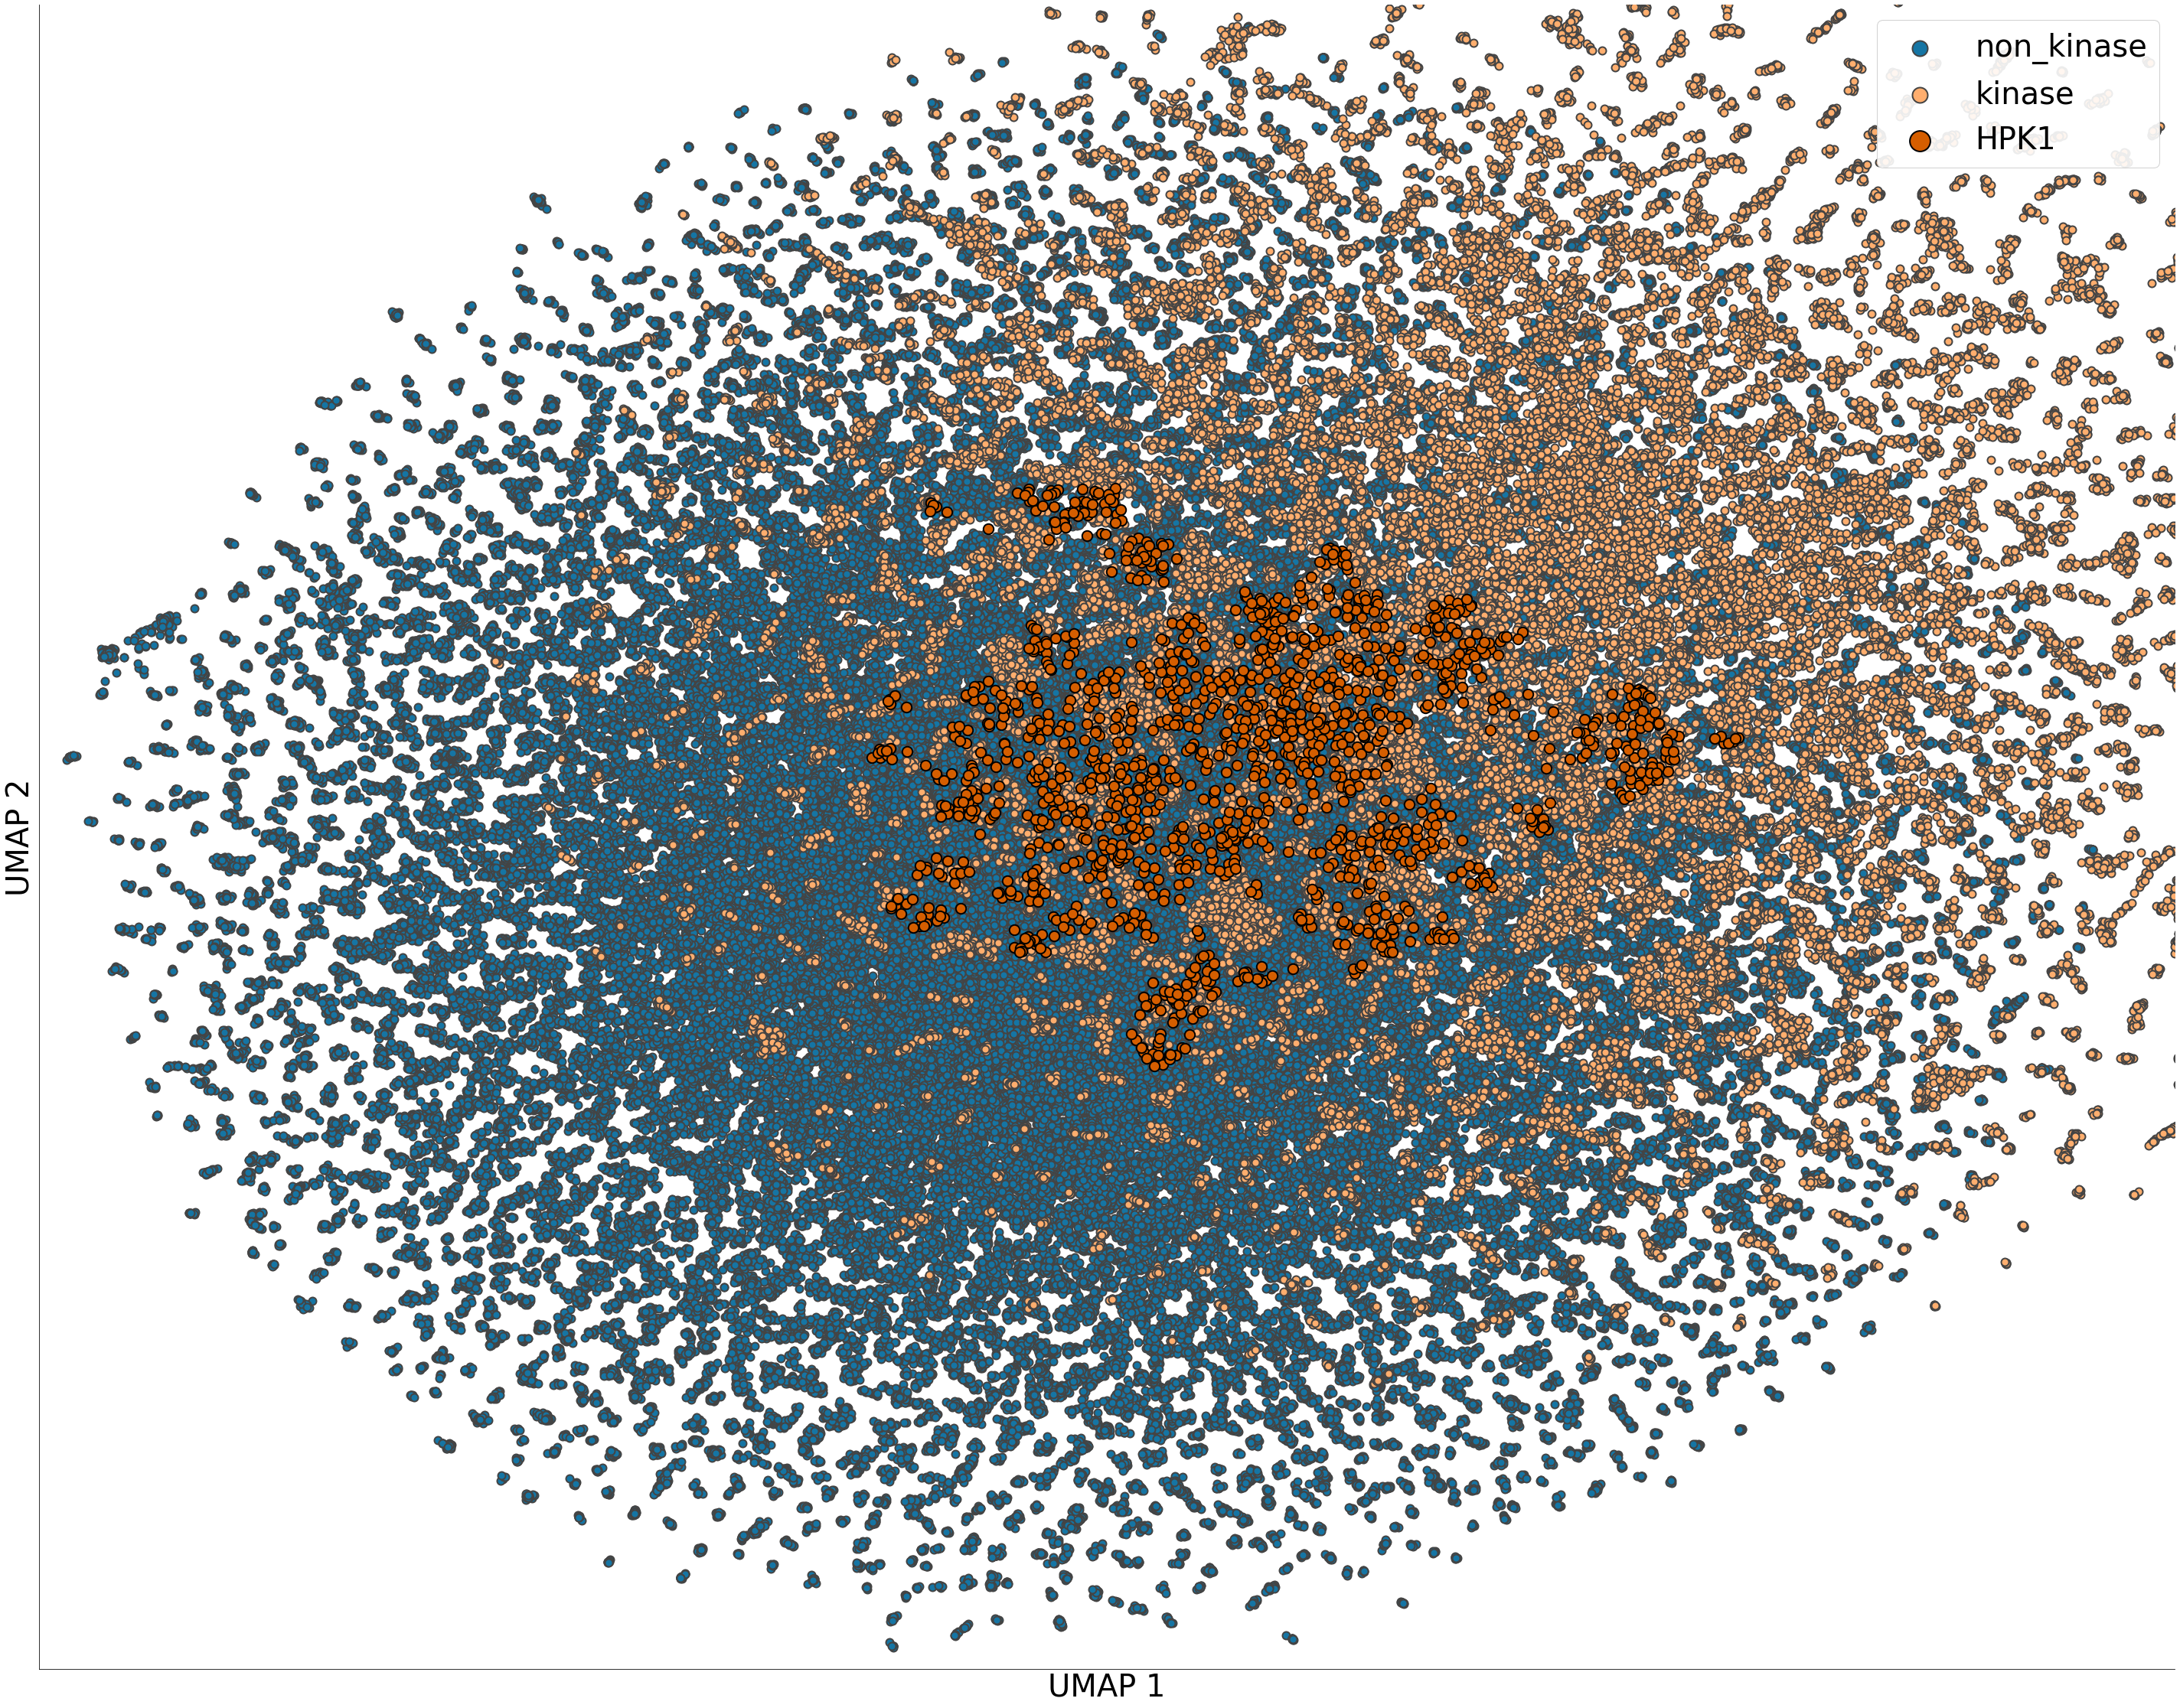

In [29]:
fig, ax = plt.subplots(figsize=(50, 40))
contour_c='#444444'
#plt.xlim([np.min(embedding_zinc[:,0])-0.5, np.max(embedding_zinc[:,0])+1.5])
#plt.ylim([np.min(embedding_zinc[:,1])-0.5, np.max(embedding_zinc[:,1])+0.5])

plt.xlim([np.min(embedding_non_kin[:,0])-0.5, np.max(embedding_non_kin[:,0])+1.5])
plt.ylim([np.min(embedding_non_kin[:,1])-0.5, np.max(embedding_non_kin[:,1])+0.5])
labelsize = 40
plt.xlabel('UMAP 1', fontsize=labelsize)
plt.ylabel('UMAP 2', fontsize=labelsize)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.scatter(embedding_zinc[:, 0], embedding_zinc[:, 1], lw=0, c='#A0E0FF', label='zinc', alpha=1.0, s=185, marker="o", edgecolors=contour_c, linewidth=2) 
plt.scatter(embedding_non_kin[:, 0], embedding_non_kin[:, 1], lw=0, c='#1575A4', label='non_kinase', alpha=1.0, s=100, marker="o", edgecolors=contour_c, linewidth=2) 
plt.scatter(embedding_kin[:, 0], embedding_kin[:, 1], lw=0, c='#FFAE6E', label='kinase', alpha=1.0, s=100, marker="o", edgecolors=contour_c, linewidth=2) 
plt.scatter(embedding_hp1[:, 0], embedding_hp1[:, 1], lw=0, c='#D55E00', label='HPK1', alpha=1.0, s=180, marker="o", edgecolors='k', linewidth=2) 

leg = plt.legend(prop={'size': labelsize}, loc='upper right', markerscale=2.00)
leg.get_frame().set_alpha(0.9)    
plt.setp(ax, xticks=[], yticks=[])
plt.show()
